Ini Adalah Tahapan Dalam Menjalankan Analisis Sentimen Melalui **SVM**

### Unduh Package

In [1]:
from google.colab import drive
from IPython.display import display
import pandas as pd
import os
import glob
#!pip install wordcloud

In [2]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Folder skripsi/Data Penelitian'


Mounted at /content/drive


### Memanggil Data


In [3]:
# List semua file dalam folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Loop untuk membaca semua CSV
dfs = {f: pd.read_csv(os.path.join(folder_path, f)) for f in files}

# Contoh akses dataframe
for name, df in dfs.items():
    print(f"File: {name}, Shape: {df.shape}")

File: 20feb25.csv, Shape: (102, 15)
File: 19feb25.csv, Shape: (54, 15)
File: 01feb25.csv, Shape: (24, 15)
File: 24feb25.csv, Shape: (97, 15)
File: 23feb25.csv, Shape: (14, 15)
File: 21feb25.csv, Shape: (39, 15)
File: 22feb25.csv, Shape: (19, 15)
File: 02feb25.csv, Shape: (23, 15)
File: 03feb25.csv, Shape: (45, 15)
File: 04feb25.csv, Shape: (39, 15)
File: 05feb25.csv, Shape: (40, 15)
File: 06feb25.csv, Shape: (42, 15)
File: 07feb25.csv, Shape: (30, 15)
File: 08feb25.csv, Shape: (16, 15)
File: 09feb25.csv, Shape: (16, 15)
File: 10feb25.csv, Shape: (31, 15)
File: 11feb25.csv, Shape: (38, 15)
File: 12feb25.csv, Shape: (50, 15)
File: 13feb25.csv, Shape: (27, 15)
File: 14feb25.csv, Shape: (57, 15)
File: 15feb25.csv, Shape: (5, 15)
File: 16feb25.csv, Shape: (19, 15)
File: 17feb25.csv, Shape: (63, 15)
File: 25feb25.csv, Shape: (48, 15)
File: 26feb25.csv, Shape: (52, 15)
File: 27feb25.csv, Shape: (99, 15)
File: 28feb25.csv, Shape: (136, 15)
File: 18feb25.csv, Shape: (35, 40)


### Membersihkan Data dan Menggabungkannya

In [4]:
all_files = glob.glob(os.path.join(folder_path, "*.csv"))  # Ambil semua file CSV
df_list = [pd.read_csv(file) for file in all_files]  # Baca semua CSV ke dalam list DataFrame
df = pd.concat(df_list, ignore_index=True)  # Gabungkan semua DataFrame

In [5]:
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,media_3_thumbnail,media_3_type,media_3_url,name,original_tweet_url,original_tweet_id,user_id,views_count,collected_at,input_url
0,1.892579e+18,Thu Feb 20 14:17:52 +0000 2025,0.0,BBRI Makin Turun Peluang atau Ancaman? https:/...,1.892579e+18,NaN,NaN,in,"Bogor, Jawa Barat",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.892562e+18,Thu Feb 20 13:10:00 +0000 2025,0.0,Dikepung Tren Pelemahan dan Rencana Buyback Be...,1.892562e+18,NaN,NaN,in,Jakarta Capital Region,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.892375e+18,Thu Feb 20 13:04:25 +0000 2025,0.0,@KompasTV Blom launching aja saham bbri sdh me...,1.892561e+18,NaN,KompasTV,in,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.892561e+18,Thu Feb 20 13:04:10 +0000 2025,0.0,menyala bbri ku,1.892561e+18,NaN,NaN,in,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.892556e+18,Thu Feb 20 12:46:06 +0000 2025,0.0,SAHAM BBRI ANCUR LAGI.!! SKEMA KASUS INI YANG ...,1.892556e+18,NaN,NaN,in,JAWA TENGAH-INDONESIA,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   conversation_id_str         1225 non-null   float64
 1   created_at                  1255 non-null   object 
 2   favorite_count              1225 non-null   float64
 3   full_text                   1255 non-null   object 
 4   id_str                      1225 non-null   float64
 5   image_url                   266 non-null    object 
 6   in_reply_to_screen_name     487 non-null    object 
 7   lang                        1225 non-null   object 
 8   location                    730 non-null    object 
 9   quote_count                 1255 non-null   float64
 10  reply_count                 1255 non-null   float64
 11  retweet_count               1255 non-null   float64
 12  tweet_url                   1255 non-null   object 
 13  user_id_str                 1225 

In [7]:
df = df[['created_at', 'full_text']]  # Ganti dengan nama kolom yang diinginkan


In [8]:
display(df)

,created_at,full_text
0,Thu Feb 20 14:17:52 +0000 2025,BBRI Makin Turun Peluang atau Ancaman? https:/...
1,Thu Feb 20 13:10:00 +0000 2025,Dikepung Tren Pelemahan dan Rencana Buyback Be...
2,Thu Feb 20 13:04:25 +0000 2025,@KompasTV Blom launching aja saham bbri sdh me...
3,Thu Feb 20 13:04:10 +0000 2025,menyala bbri ku
4,Thu Feb 20 12:46:06 +0000 2025,SAHAM BBRI ANCUR LAGI.!! SKEMA KASUS INI YANG ...
...,...,...
1255,NaN,NaN
1256,NaN,NaN
1257,NaN,NaN
1258,NaN,NaN


In [9]:
# Pastikan kolom 'created_at' dalam format datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Urutkan berdasarkan tanggal dari yang paling lama ke terbaru
df = df.sort_values(by='created_at', ascending=True)

# Reset index agar rapih setelah pengurutan
df = df.reset_index(drop=True)

# Cek hasil
df.head()  # Menampilkan 5 data pertama




/tmp/ipython-input-9-676499784.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


,created_at,full_text
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin I...
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bb...
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E ...
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly cha...


In [10]:
df = df.dropna()
bbri_df = df.sort_values(by='created_at', ascending=True)
print(bbri_df)

                    created_at  \
0    2025-02-01 01:56:24+00:00   
1    2025-02-01 02:16:00+00:00   
2    2025-02-01 02:38:12+00:00   
3    2025-02-01 02:46:09+00:00   
4    2025-02-01 02:58:44+00:00   
...                        ...   
1250 2025-02-28 21:18:18+00:00   
1251 2025-02-28 22:38:32+00:00   
1252 2025-02-28 22:41:15+00:00   
1253 2025-02-28 23:23:33+00:00   
1254 2025-02-28 23:55:59+00:00   

                                              full_text  
0     @EvaMalca @valentrywandi Emang dia yg ajarin I...  
1                           Habis ini akan borong BBRI   
2     @marvelle_danny @valentrywandi kenapa harus bb...  
3     Saham $BBRI saat ini memiliki nilai rasio P/E ...  
4     Mengapa harus ragu? Secara teknikal weekly cha...  
...                                                 ...  
1250  @FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__...  
1251  #0017: portofolio warteg saham BY JO ot B: 28/...  
1252  Udah diniatin mau beli bbri tapi entah tiap ma...  
1253  BERIT

Berikutnya adalah Tahapan Preprocessing, Fungsinya adalah mempersiapkan data dalam bentuk yang sesuai untuk analisis sentimen

## Case Folding


In [11]:
# Ubah seluruh teks menjadi huruf kecil (case folding)
bbri_df['text_casefolded'] = bbri_df['full_text'].str.lower()
display(bbri_df)

,created_at,full_text,text_casefolded
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin I...,@evamalca @valentrywandi emang dia yg ajarin i...
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bb...,@marvelle_danny @valentrywandi kenapa harus bb...
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E ...,saham $bbri saat ini memiliki nilai rasio p/e ...
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly cha...,mengapa harus ragu? secara teknikal weekly cha...
...,...,...,...
1250,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__...,@flckr_id @imsanto71 @me_iwan @stefanantonio__...
1251,2025-02-28 22:38:32+00:00,#0017: portofolio warteg saham BY JO ot B: 28/...,#0017: portofolio warteg saham by jo ot b: 28/...
1252,2025-02-28 22:41:15+00:00,Udah diniatin mau beli bbri tapi entah tiap ma...,udah diniatin mau beli bbri tapi entah tiap ma...
1253,2025-02-28 23:23:33+00:00,BERITA POPULER: Dividen BBRI hingga Koreksi Be...,berita populer: dividen bbri hingga koreksi be...


In [12]:
# prompt: buat tabel agar kalimat dapat terbaca semua

import pandas as pd
pd.set_option('display.max_colwidth', None)
display(bbri_df)

,created_at,full_text,text_casefolded
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa
...,...,...,...
1250,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__ @MasBroJowoNKRI BCA turunnya lebih slow. Kalo BBRI kemarin turun 7% dalam sehari,@flckr_id @imsanto71 @me_iwan @stefanantonio__ @masbrojowonkri bca turunnya lebih slow. kalo bbri kemarin turun 7% dalam sehari
1251,2025-02-28 22:38:32+00:00,#0017: portofolio warteg saham BY JO ot B: 28/02/2025: McopeetS bbri dssa: simak CUTE pada hasil transaksi McS bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot B): https://t.co/W2o7dAMbpD,#0017: portofolio warteg saham by jo ot b: 28/02/2025: mcopeets bbri dssa: simak cute pada hasil transaksi mcs bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot b): https://t.co/w2o7dambpd
1252,2025-02-28 22:41:15+00:00,Udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe,udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe
1253,2025-02-28 23:23:33+00:00,BERITA POPULER: Dividen BBRI hingga Koreksi Besar Harga Emas Antam (ANTM) #saham #emas #investasi https://t.co/WtSphzHZkX,berita populer: dividen bbri hingga koreksi besar harga emas antam (antm) #saham #emas #investasi https://t.co/wtsphzhzkx


## Text Cleaning

In [13]:
import re

# Bersihkan teks dari mention, hashtag, URL, RT, simbol, tanda baca, angka, dan spasi berlebih
def clean_text(text):
    text = re.sub(r"(@[A-Za-z0-9_]+)|(#\w+)|(http\S+)|(^rt)", "", text)   # hapus mention, hashtag, URL, dan RT
    text = re.sub(r"[^a-z\s]", "", text)                                  # hapus simbol dan tanda baca
    text = re.sub(r"\d+", "", text)                                       # hapus angka
    text = re.sub(r"\s+", " ", text).strip()                              # hapus spasi berlebih
    return text

# Terapkan cleaning pada teks yang sudah case folding
bbri_df['text_clean'] = bbri_df['text_casefolded'].apply(clean_text)
display(bbri_df)


,created_at,full_text,text_casefolded,text_clean
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi
...,...,...,...,...
1250,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__ @MasBroJowoNKRI BCA turunnya lebih slow. Kalo BBRI kemarin turun 7% dalam sehari,@flckr_id @imsanto71 @me_iwan @stefanantonio__ @masbrojowonkri bca turunnya lebih slow. kalo bbri kemarin turun 7% dalam sehari,bca turunnya lebih slow kalo bbri kemarin turun dalam sehari
1251,2025-02-28 22:38:32+00:00,#0017: portofolio warteg saham BY JO ot B: 28/02/2025: McopeetS bbri dssa: simak CUTE pada hasil transaksi McS bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot B): https://t.co/W2o7dAMbpD,#0017: portofolio warteg saham by jo ot b: 28/02/2025: mcopeets bbri dssa: simak cute pada hasil transaksi mcs bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot b): https://t.co/w2o7dambpd,portofolio warteg saham by jo ot b mcopeets bbri dssa simak cute pada hasil transaksi mcs bbri laporan lengkap portofolio menunggu validasi broker sekuritas ot b
1252,2025-02-28 22:41:15+00:00,Udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe,udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe,udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe its a sign from the universe
1253,2025-02-28 23:23:33+00:00,BERITA POPULER: Dividen BBRI hingga Koreksi Besar Harga Emas Antam (ANTM) #saham #emas #investasi https://t.co/WtSphzHZkX,berita populer: dividen bbri hingga koreksi besar harga emas antam (antm) #saham #emas #investasi https://t.co/wtsphzhzkx,berita populer dividen bbri hingga koreksi besar harga emas antam antm


## Tokenizing

In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab dataset
from nltk.tokenize import sent_tokenize, word_tokenize
bbri_df['text_tokens'] = bbri_df['text_clean'].apply(lambda x: word_tokenize(x))
bbri_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,created_at,full_text,text_casefolded,text_clean,text_tokens
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]"


## Normalisasi

In [15]:
import pandas as pd
# Fungsi untuk normalisasi
def normalize_text(tokens, normalization_dict):
    return [normalization_dict.get(word, word) for word in tokens]

# Load normalization dictionary from the CSV file
colloquial_dict_path = '/content/drive/MyDrive/Folder skripsi/Script/colloquial-indonesian-lexicon.csv'

# Read the CSV, assuming it has two columns: 'slang' and 'formal'
colloquial_df = pd.read_csv(colloquial_dict_path)

# Create a dictionary from the DataFrame
normalization_dict = dict(zip(colloquial_df['slang'], colloquial_df['formal']))

# Apply normalization after stemming
bbri_df['text_normalized'] = bbri_df['text_tokens'].apply(lambda tokens: normalize_text(tokens, normalization_dict))

bbri_df.head()

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]"


## Stopword Removal

In [16]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [17]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Stopword dari Sastrawi saja (tanpa custom)
factory = StopWordRemoverFactory()
stopwords_sastrawi = set(factory.get_stop_words())

# Fungsi untuk menghapus stopword
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords_sastrawi]

# Terapkan ke data
bbri_df['text_stopword'] = bbri_df['text_normalized'].apply(remove_stopwords)

# Tampilkan hasil
bbri_df.head()

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]"


## Stemming

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

bbri_df['text_stemmed'] = bbri_df['text_stopword'].apply(stemming)

bbri_df.head()

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]","[saham, bbri, milik, nilai, rasio, pe, sangat, rendah, tahun, akhir, saat, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]"


Setelah itu adalah Memviasualisasikan untuk melihat jumlah mayoritas kata

## Wordcloud

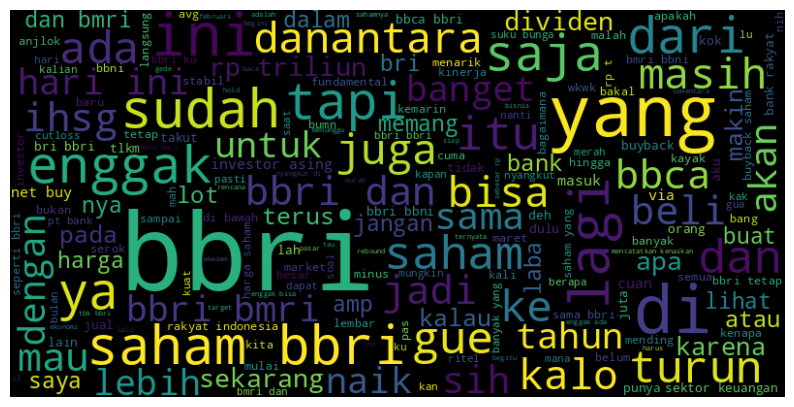

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks yang sudah di-stemming menjadi satu string
all_words = ' '.join([text for text in bbri_df['text_normalized'].apply(lambda x: ' '.join(x))])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)

# Tampilkan WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Frekuensi Kata

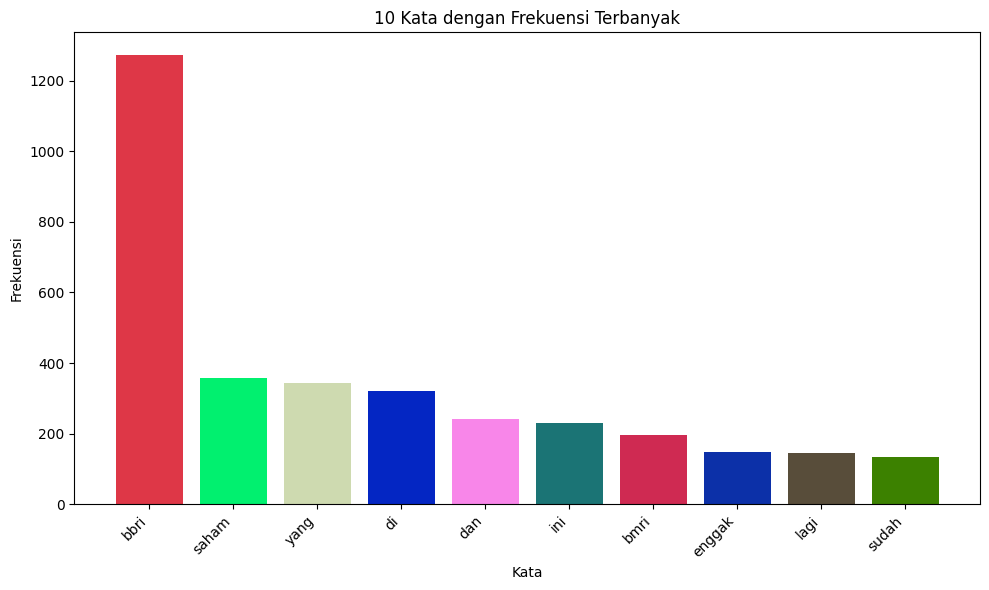

In [20]:
from collections import Counter
import matplotlib.pyplot as plt
import random

# Gabungkan semua list token hasil stemming
all_stemmed_tokens = [token for sublist in bbri_df['text_normalized'] for token in sublist]

# Hitung frekuensi kata
word_counts = Counter(all_stemmed_tokens)

# Ambil 10 kata teratas
top_10_words = word_counts.most_common(10)

# Pisahkan kata dan frekuensinya
words, counts = zip(*top_10_words)

# Buat daftar warna acak
colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range(len(words))]

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('10 Kata dengan Frekuensi Terbanyak')
plt.xticks(rotation=45, ha='right') # Rotasi label x agar tidak tumpang tindih
plt.tight_layout() # Menyesuaikan layout
plt.show()

In [21]:
bbri_df.head(30)

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]","[saham, bbri, milik, nilai, rasio, pe, sangat, rendah, tahun, akhir, saat, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]"
5,2025-02-01 03:34:05+00:00,sudah waktunya bbri ath,sudah waktunya bbri ath,sudah waktunya bbri ath,"[sudah, waktunya, bbri, ath]","[sudah, waktunya, bbri, ath]","[waktunya, bbri, ath]","[waktu, bbri, ath]"
6,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Saat banyak yang tebar fear (seperti BBRI lalu) berarti waktunya cicil masuk,@doktermarket bbca juga lagi dikasih masuk. saat banyak yang tebar fear (sep

In [22]:
bbri_df.to_csv('/content/drive/MyDrive/Folder skripsi/Script/bbri_pre.csv', index=False)
print("bbri_df saved successfully to '/content/drive/MyDrive/Folder skripsi/Script/.csv'")

bbri_df saved successfully to '/content/drive/MyDrive/Folder skripsi/Script/.csv'


In [23]:
# import pandas as pd
# bbri_df = pd.read_csv('/content/drive/MyDrive/Folder skripsi/Script/bbri_pre.csv')
# print(bbri_df.head())

In [24]:
import pandas as pd
bbri_sentimen = pd.read_csv('/content/drive/MyDrive/Folder skripsi/Label Sentimen/bbri_sentimen.csv')
bbri_sentimen.head(30)


,created_at,full_text,sentimen
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,negatif
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,positif
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,negatif
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,netral
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,positif
5,2025-02-01 03:34:05+00:00,sudah waktunya bbri ath,positif
6,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Saat banyak yang tebar fear (seperti BBRI lalu) berarti waktunya cicil masuk,positif
7,2025-02-01 04:20:17+00:00,BBRI trades at 1.9x PB 25CL with 8% div yield. Valuasi sudah super murah wajar diusulkan buat BUYBACK Channel https://t.co/xBidHQEGRD https://t.co/O8Cw0F8Ehu,netral
8,2025-02-01 04:49:25+00:00,PT Bank Rakyat Indonesia (Persero) Tbk (BBRI) menghapus kredit macet senilai Rp71 triliun terutama dari debitur sektor Usaha Mikro Kecil dan Menengah (UMKM). Baca selengkapnya: https://t.co/h2YG2jCoMf : IDNFinancials https://t.co/ueoPhQg61O,netral
9,2025-02-01 04:57:07+00:00,@EvaMalca @valentrywandi Bbri nyangkut saham lain invest,negatif


In [25]:
bbri_sentimen.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  1255 non-null   object
 1   full_text   1255 non-null   object
 2   sentimen    1255 non-null   object
dtypes: object(3)
memory usage: 29.5+ KB


In [26]:
import pandas as pd
# Menggabungkan bbri_df dengan bbri_sentimen berdasarkan index
# Asumsi bbri_sentimen memiliki index yang sama dengan bbri_df setelah preprocessing

# Pastikan kedua DataFrames memiliki jumlah baris yang sama
if len(bbri_df) == len(bbri_sentimen):
  bbri_df_merged = pd.concat([bbri_df, bbri_sentimen['sentimen']], axis=1)
  display(bbri_df_merged)
else:
  print("Jumlah baris pada bbri_df dan bbri_sentimen tidak sama, tidak dapat menggabungkan.")

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,sentimen
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]",negatif
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]",positif
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]",negatif
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]","[saham, bbri, milik, nilai, rasio, pe, sangat, rendah, tahun, akhir, saat, beli]",netral
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]",positif
...,...,...,...,...,...,...,...,...,...
1250,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__ @MasBroJowoNKRI BCA turunnya lebih slow. Kalo BBRI kemarin turun 7% dalam sehari,@flckr_id @imsanto71 @me_iwan @stefanantonio__ @masbrojowonkri bca turunnya lebih slow. kalo bbri kemarin turun 7% dalam sehari,bca turunnya lebih slow kalo bbri kemarin turun dalam seh

In [27]:
# Buang baris dengan nilai 'tidak berguna' di kolom 'sentimen'
bbri_df_merged = bbri_df_merged[bbri_df_merged['sentimen'] != 'tidak berguna']
bbri_df_merged = bbri_df_merged[bbri_df_merged['sentimen'] != 'netral']
bbri_df_merged = bbri_df_merged.reset_index(drop=True)
display(bbri_df_merged)


,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,sentimen
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]",negatif
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]",positif
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]",negatif
3,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]",positif
4,2025-02-01 03:34:05+00:00,sudah waktunya bbri ath,sudah waktunya bbri ath,sudah waktunya bbri ath,"[sudah, waktunya, bbri, ath]","[sudah, waktunya, bbri, ath]","[waktunya, bbri, ath]","[waktu, bbri, ath]",positif
...,...,...,...,...,...,...,...,...,...
885,2025-02-28 19:28:33+00:00,ternyata semakin cinta bbri yuk bisa serok 10 lot tanggal 1,ternyata semakin cinta bbri yuk bisa serok 10 lot tanggal 1,ternyata semakin cinta bbri yuk bisa serok lot tanggal,"[ternyata, semakin, cinta, bbri, yuk, bisa, serok, lot, tanggal]","[ternyata, semakin, cinta, bbri, yuk, bisa, serok, lot, tanggal]","[ternyata, semakin, cinta, bbri, yuk, serok, lot, tanggal]","[nyata, makin, cinta, bbri, yuk, serok, lot, tanggal]",positif
886,2025-02-28 20:45:14+00:00,selamat berpuasa dan selamat beristirahat tenang holder2 bbri bmri dan bbca siap2 senin dibanting lgi,selamat berpuasa dan selamat beristirahat tenang holder2 bbri bmri dan bbca siap2 senin dibanting lgi,selamat berpuasa dan selamat beristirahat tenang holder bbri bmri dan bbca siap senin dibanting lgi,"[selamat, berpuasa, dan, selamat, beristirahat, tenang, holder, bbri, bmri, dan, bbca, siap, senin, dibanting, lgi]","[sela

Selanjutnya adalah TF-IDF



## TF-IDF

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

X = bbri_df_merged['text_stemmed'].apply(lambda x: ' '.join(x))
y = bbri_df_merged['sentimen']



In [33]:
# Pembagian data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan terapkan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Latih model SVM Linear
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Lakukan prediksi pada data uji
y_pred = svm_model.predict(X_test_tfidf)

# Prediksi probabilitas untuk penentuan skor
y_proba = svm_model.predict_proba(X_test_tfidf)

In [34]:
skor_sentimen = []
for i in range(len(y_pred)):
    if y_pred[i] == 'positif':
        skor_sentimen.append(+y_proba[i][1])  # probabilitas positif
    else:
        skor_sentimen.append(-y_proba[i][0])  # probabilitas negatif


In [35]:
# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     negatif       0.82      0.89      0.85       112
     positif       0.79      0.67      0.72        66

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178

Confusion Matrix:
[[100  12]
 [ 22  44]]


In [36]:
import pandas as pd

hasil_df = pd.DataFrame({
    'text': X_test,
    'actual_label': y_test,
    'predicted_label': y_pred,
    'sentiment_score': skor_sentimen
})
hasil_df.head()


,text,actual_label,predicted_label,sentiment_score
280,bbri kapan naik anyinkkk gue mau beli nars,negatif,negatif,-0.475394
434,bbri sempat turun bisnis bri tetap jalan kuat,positif,positif,0.991410
39,overpriced memang ihsg gara gara pan dkk padahal bbri bbca aman,positif,negatif,-0.944654
417,guys aku lihat banyak panik soal uang bank bumn jangan panik dulu setor danantara dividen laba pegang saham jadi lama uang kalian bentuk bukan saham imo enggak ngefek kalian punya sekian lot saham bmribbnibbri nah khawatir,negatif,positif,0.841133
585,kredit umkm bbri mulai pulen simak rapor bbri tumbuh net interest income aset loan amp dpk buruk panjang sejarah luar covid lengkap,negatif,positif,0.743344


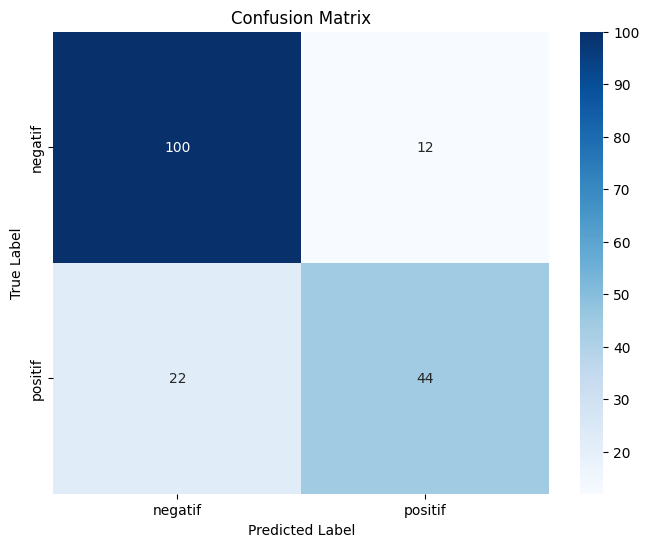

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
classes = np.unique(y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
